
# Madhavi Ghanta
## Exercise 3.2
## DSC 530
## 06/22/23

## Exercise 1-1 -- Open chap01ex.ipynb and execute the all the cells.


from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)
        
        download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")

download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")

download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dct")
download(
    "https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dat.gz"
)

In [9]:
from __future__ import print_function, division

import nsfg

# Examples from Chapter 1
## Read NSFG data into a Pandas DataFrame.

In [13]:
preg = nsfg.ReadFemPreg()
preg.head()


,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875


## Print the column names.

In [23]:
print(preg.columns)


Index(['caseid', 'pregordr', 'howpreg_n', 'howpreg_p', 'moscurrp', 'nowprgdk',
       'pregend1', 'pregend2', 'nbrnaliv', 'multbrth',
       ...
       'laborfor_i', 'religion_i', 'metro_i', 'basewgt', 'adj_mod_basewgt',
       'finalwgt', 'secu_p', 'sest', 'cmintvw', 'totalwgt_lb'],
      dtype='object', length=244)


### Select a single column name.

In [24]:
print(preg.columns[1])

pregordr


## Select a column and check what type it is.


In [16]:
pregordr = preg['pregordr']
type(pregordr)

pandas.core.series.Series

## Print a column.

In [25]:
print(pregordr)

0        1
1        2
2        1
3        2
4        3
        ..
13588    1
13589    2
13590    3
13591    4
13592    5
Name: pregordr, Length: 13593, dtype: int64


## Select a single element from a column.

In [26]:
print(pregordr[0])

1


## Select a slice from a column.

In [27]:
pregordr[4:8]

4    3
5    1
6    2
7    3
Name: pregordr, dtype: int64

## Select a column using dot notation.

In [20]:
pregordr = preg.pregordr

## Count the number of times each value occurs.

In [28]:
print(preg.outcome.value_counts().sort_index())

1    9148
2    1862
3     120
4    1921
5     190
6     352
Name: outcome, dtype: int64


## Check the values of another variable.

In [29]:
print(preg.birthwgt_lb.value_counts().sort_index())

0.0        8
1.0       40
2.0       53
3.0       98
4.0      229
5.0      697
6.0     2223
7.0     3049
8.0     1889
9.0      623
10.0     132
11.0      26
12.0      10
13.0       3
14.0       3
15.0       1
Name: birthwgt_lb, dtype: int64


## Make a dictionary that maps from each respondent's caseid to a list of indices into the pregnancy DataFrame. Use it to select the pregnancy outcomes for a single respondent.

In [34]:
caseid = 10229
preg_map = nsfg.MakePregMap(preg)
indices = preg_map[caseid]
preg.outcome[indices].values

array([4, 4, 4, 4, 4, 4, 1], dtype=int64)

# Exercises

## Select the birthord column, print the value counts, and compare to results published in the codebook


In [41]:
print(preg.birthord.value_counts().sort_index())

1.0     4413
2.0     2874
3.0     1234
4.0      421
5.0      126
6.0       50
7.0       20
8.0        7
9.0        2
10.0       1
Name: birthord, dtype: int64


## We can also use isnull to count the number of nans.

In [42]:
preg.birthord.isnull().sum()


4445

## Select the prglngth column, print the value counts, and compare to results published in the codebook

In [43]:
print(preg.prglngth.value_counts().sort_index())

0       15
1        9
2       78
3      151
4      412
5      181
6      543
7      175
8      409
9      594
10     137
11     202
12     170
13     446
14      29
15      39
16      44
17     253
18      17
19      34
20      18
21      37
22     147
23      12
24      31
25      15
26     117
27       8
28      38
29      23
30     198
31      29
32     122
33      50
34      60
35     357
36     329
37     457
38     609
39    4744
40    1120
41     591
42     328
43     148
44      46
45      10
46       1
47       1
48       7
50       2
Name: prglngth, dtype: int64


## To compute the mean of a column, you can invoke the mean method on a Series. For example, here is the mean birthweight in pounds:

In [44]:
print(preg.totalwgt_lb.mean())

7.265628457623368


## Create a new column named totalwgt_kg that contains birth weight in kilograms. Compute its mean. Remember that when you create a new column, you have to use dictionary syntax, not dot notation.

In [45]:
preg['totalwgt_kg'] = preg.totalwgt_lb / 2.2046
print(preg.totalwgt_kg.mean())

3.29566744879946


## nsfg.py also provides ReadFemResp, which reads the female respondents file and returns a DataFrame:

In [49]:
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dct")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dat.gz")

Downloaded 2002FemResp.dct
Downloaded 2002FemResp.dat.gz


In [50]:
resp = nsfg.ReadFemResp()

## DataFrame provides a method head that displays the first five rows:

In [51]:
resp.head()


,caseid,rscrinf,rdormres,rostscrn,rscreenhisp,rscreenrace,age_a,age_r,cmbirth,agescrn,...,pubassis_i,basewgt,adj_mod_basewgt,finalwgt,secu_r,sest,cmintvw,cmlstyr,screentime,intvlngth
0,2298,1,5,5,1,5.0,27,27,902,27,...,0,3247.916977,5123.759559,5556.717241,2,18,1234,1222,18:26:36,110.492667
1,5012,1,5,1,5,5.0,42,42,718,42,...,0,2335.279149,2846.799490,4744.191350,2,18,1233,1221,16:30:59,64.294000
2,11586,1,5,1,5,5.0,43,43,708,43,...,0,2335.279149,2846.799490,4744.191350,2,18,1234,1222,18:19:09,75.149167
3,6794,5,5,4,1,5.0,15,15,1042,15,...,0,3783.152221,5071.464231,5923.977368,2,18,1234,1222,15:54:43,28.642833
4,616,1,5,4,1,5.0,20,20,991,20,...,0,5341.329968,6437.335772,7229.128072,2,18,1233,1221,14:19:44,69.502667


## Select the age_r column from resp and print the value counts. How old are the youngest and oldest respondents?

In [61]:
print(resp.age_r.value_counts().sort_index())
# The youngest respondents are 15 and the oldest are 44.


15    217
16    223
17    234
18    235
19    241
20    258
21    267
22    287
23    282
24    269
25    267
26    260
27    255
28    252
29    262
30    292
31    278
32    273
33    257
34    255
35    262
36    266
37    271
38    256
39    215
40    256
41    250
42    215
43    253
44    235
Name: age_r, dtype: int64


## # The youngest respondents are 15 and the oldest are 44.

## We can use the caseid to match up rows from resp and preg. For example, we can select the row from resp for caseid 2298 like this:

In [62]:
resp[resp.caseid==2298]

,caseid,rscrinf,rdormres,rostscrn,rscreenhisp,rscreenrace,age_a,age_r,cmbirth,agescrn,...,pubassis_i,basewgt,adj_mod_basewgt,finalwgt,secu_r,sest,cmintvw,cmlstyr,screentime,intvlngth
0,2298,1,5,5,1,5.0,27,27,902,27,...,0,3247.916977,5123.759559,5556.717241,2,18,1234,1222,18:26:36,110.492667


## And we can get the corresponding rows from preg like this:

In [64]:
preg[preg.caseid==2298]

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb,totalwgt_kg
2610,2298,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,6.8750,3.118480
2611,2298,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,5.5000,2.494784
2612,2298,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,4.1875,1.899438
2613,2298,4,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,6.8750,3.118480


In [65]:
preg[preg.caseid==2298]

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb,totalwgt_kg
2610,2298,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,6.8750,3.118480
2611,2298,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,5.5000,2.494784
2612,2298,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,4.1875,1.899438
2613,2298,4,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,6.8750,3.118480


How old is the respondent with caseid 1?

In [66]:
resp[resp.caseid == 1].age_r

1069    44
Name: age_r, dtype: int64

## # The respondent age is 44.


## What are the pregnancy lengths for the respondent with caseid 2298?

In [67]:
preg[preg.caseid==2298].prglngth
# The pregnacy lengths are 40, 36, 30 and 40 for this respondent.

2610    40
2611    36
2612    30
2613    40
Name: prglngth, dtype: int64

In [68]:
# What was the birthweight of the first baby born to the respondent with caseid 5012?
print(preg[preg.caseid==5012].birthwgt_lb)
print(preg[preg.caseid==5012].totalwgt_kg)
# The birthweight was 6 lbs. or 2.7216 kg.

5515    6.0
Name: birthwgt_lb, dtype: float64
5515    2.721582
Name: totalwgt_kg, dtype: float64


# Exercise 1-2

In [78]:
##   Copy and paste all the functions defined in the file nsfg.py
from __future__ import print_function, division

import sys
import numpy as np
import thinkstats2

from collections import defaultdict


def ReadFemResp(dct_file='2002FemResp.dct',
                dat_file='2002FemResp.dat.gz',
                nrows=None):
    """Reads the NSFG respondent data.

    dct_file: string file name
    dat_file: string file name

    returns: DataFrame
    """
    dct = thinkstats2.ReadStataDct(dct_file)
    df = dct.ReadFixedWidth(dat_file, compression='gzip', nrows=nrows)
    CleanFemResp(df)
    return df


def CleanFemResp(df):
    """Recodes variables from the respondent frame.

    df: DataFrame
    """
    pass


def ReadFemPreg(dct_file='2002FemPreg.dct',
                dat_file='2002FemPreg.dat.gz'):
    """Reads the NSFG pregnancy data.

    dct_file: string file name
    dat_file: string file name

    returns: DataFrame
    """
    dct = thinkstats2.ReadStataDct(dct_file)
    df = dct.ReadFixedWidth(dat_file, compression='gzip')
    CleanFemPreg(df)
    return df


def CleanFemPreg(df):
    """Recodes variables from the pregnancy frame.

    df: DataFrame
    """
    # mother's age is encoded in centiyears; convert to years
    df.agepreg /= 100.0

    # birthwgt_lb contains at least one bogus value (51 lbs)
    # replace with NaN
    df.loc[df.birthwgt_lb > 20, 'birthwgt_lb'] = np.nan
    
    # replace 'not ascertained', 'refused', 'don't know' with NaN
    na_vals = [97, 98, 99]
    df.birthwgt_lb.replace(na_vals, np.nan, inplace=True)
    df.birthwgt_oz.replace(na_vals, np.nan, inplace=True)
    df.hpagelb.replace(na_vals, np.nan, inplace=True)

    df.babysex.replace([7, 9], np.nan, inplace=True)
    df.nbrnaliv.replace([9], np.nan, inplace=True)

    # birthweight is stored in two columns, lbs and oz.
    # convert to a single column in lb
    # NOTE: creating a new column requires dictionary syntax,
    # not attribute assignment (like df.totalwgt_lb)
    df['totalwgt_lb'] = df.birthwgt_lb + df.birthwgt_oz / 16.0    

    # due to a bug in ReadStataDct, the last variable gets clipped;
    # so for now set it to NaN
    df.cmintvw = np.nan


def ValidatePregnum(resp, preg):
    """Validate pregnum in the respondent file.

    resp: respondent DataFrame
    preg: pregnancy DataFrame
    """
    # make the map from caseid to list of pregnancy indices
    preg_map = MakePregMap(preg)
    
    # iterate through the respondent pregnum series
    for index, pregnum in resp.pregnum.iteritems():
        caseid = resp.caseid[index]
        indices = preg_map[caseid]

        # check that pregnum from the respondent file equals
        # the number of records in the pregnancy file
        if len(indices) != pregnum:
            print(caseid, len(indices), pregnum)
            return False

    return True


def MakePregMap(df):
    """Make a map from caseid to list of preg indices.

    df: DataFrame

    returns: dict that maps from caseid to list of indices into `preg`
    """
    d = defaultdict(list)
    for index, caseid in df.caseid.iteritems():
        d[caseid].append(index)
    return d


def main():
    """Tests the functions in this module.

    script: string script name
    """
    # read and validate the respondent file
    resp = ReadFemResp()

    assert(len(resp) == 7643)
    assert(resp.pregnum.value_counts()[1] == 1267)

    # read and validate the pregnancy file
    preg = ReadFemPreg()
    print(preg.shape)

    assert len(preg) == 13593
    assert preg.caseid[13592] == 12571
    assert preg.pregordr.value_counts()[1] == 5033
    assert preg.nbrnaliv.value_counts()[1] == 8981
    assert preg.babysex.value_counts()[1] == 4641
    assert preg.birthwgt_lb.value_counts()[7] == 3049
    assert preg.birthwgt_oz.value_counts()[0] == 1037
    assert preg.prglngth.value_counts()[39] == 4744
    assert preg.outcome.value_counts()[1] == 9148
    assert preg.birthord.value_counts()[1] == 4413
    assert preg.agepreg.value_counts()[22.75] == 100
    assert preg.totalwgt_lb.value_counts()[7.5] == 302

    weights = preg.finalwgt.value_counts()
    key = max(weights.keys())
    assert preg.finalwgt.value_counts()[key] == 6

    # validate that the pregnum column in `resp` matches the number
    # of entries in `preg`
    assert(ValidatePregnum(resp, preg))

    
    print('All tests passed.')


if __name__ == '__main__':
    main()


(13593, 244)
All tests passed.


In [71]:
preg = nsfg.ReadFemPreg() # Read the respondent file and assign a name 'preg'. 

In [72]:
preg.pregnum # Take a look at pregnum variable

0        2
1        2
2        3
3        3
4        3
        ..
13588    5
13589    5
13590    5
13591    5
13592    5
Name: pregnum, Length: 13593, dtype: int64

In [73]:
preg.pregnum.value_counts().sort_index() # Check the value counts for the variable pregnum  

1     1267
2     2864
3     3330
4     2444
5     1525
6      900
7      560
8      320
9      189
10      90
11      33
12      24
14      28
19      19
Name: pregnum, dtype: int64

In [75]:
resp = nsfg.ReadFemResp()
ValidatePregnum(resp, preg)

True

In [76]:
caseid = 10229
preg_map = nsfg.MakePregMap(preg)
indices = preg_map[caseid]
preg.outcome[indices].values

array([4, 4, 4, 4, 4, 4, 1], dtype=int64)

# Exercise 2.1
To summarize pregnancy length of firstborns compared to other newborns based on what I've learned in this chapter, I would say that the data shows very little overall difference in arrival times between firstborns and other newborns. Given the wide variance in pregnancy length, with a standard deviation of over two weeks, a 13 hour difference seems pretty small, and shows, if anything, that first babies actually arrive earlier, not later.

If I wanted to blow things out of proportion to make the news, I would probably first get a p-value to see if the results are significant. If they were, my headline would be something like: "Has your family been lying to you? New study reveals that firstborns arrive significantly earlier than later pregnancies!"

If I was trying to reassure an anxious patient, I would point out the wide spread in pregnancy lengths (which skew toward being shorter than the typical length if she doesn't like being pregnant) to show that there are a wide variety of normal pregnancies that produce healthy babies.

"Do first babies arrive late?"

It is often said that a mother's first pregnancy lasts longer than her later pregnancies. Let's take a look at the data to see if this old wives tale is true, or if the first pregnancy just feels longer. Using CDC data from a recent National Survey of amily Growth, we've learned that the average length of a first pregnancy is 38.60 weeks, compared to 38.52 weeks for all other pregnancies combined. If you're thinking this looks like a small difference, you'd be right, because this amounts to just a little over 13 hours and not just that, but the first pregnancies are, on average, actually shorter not longer. Looking at all the data together, we get a standard deviation of 2.70 weeks, making a difference of just 0.08 weeks seem pretty insignificant overall. So considering the many things a new mother has to concern herself with, whether her this newborn will arrive earlier or later than any of her following pregnancies isn't one of them.

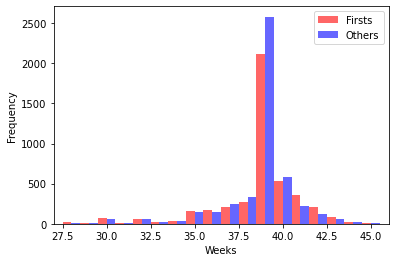

38.60095173351461
38.52291446673706
39
39
0.028879044654449883


<Figure size 576x432 with 0 Axes>

In [79]:
import thinkstats2
import thinkplot
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome ==1]
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

# Histogram
first_hist = thinkstats2.Hist(firsts.prglngth)
other_hist = thinkstats2.Hist(others.prglngth)
width = .5
thinkplot.PrePlot(2)
thinkplot.Hist(first_hist, align='right', width=width, label='Firsts', color='red')
thinkplot.Hist(other_hist, align='left', width=width, label ='Others', color='blue')
thinkplot.Show(xlabel='Weeks', ylabel='Frequency', xlim=[27, 46])

# Means
first_mean = thinkstats2.Mean(firsts.prglngth)
other_mean = thinkstats2.Mean(others.prglngth)
print(first_mean)
print(other_mean)

# Median
first_med = thinkstats2.Median(firsts.prglngth)
other_med = thinkstats2.Median(others.prglngth)
print(first_med)
print(other_med)

#CohenD
cohenD = thinkstats2.CohenEffectSize(firsts.prglngth, others.prglngth)
print(cohenD)

# 2-4

In [81]:
import nsfg
import thinkstats2
import thinkplot
import numpy as np

In [82]:
# Filter for only live births
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]

# Create firsts and others groupings
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

In [83]:
# Set floor for weights to avoid overlap
first_weights = np.floor(firsts.totalwgt_lb)
other_weights = np.floor(others.totalwgt_lb)

# Set histograms
first_hist = thinkstats2.Hist(first_weights, label = 'Firstborns')
other_hist = thinkstats2.Hist(other_weights, label = 'Later Born')

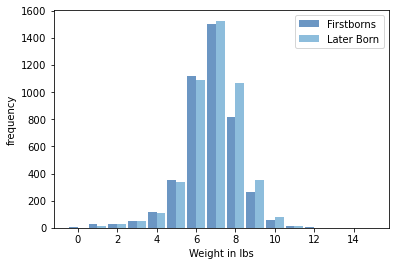

<Figure size 576x432 with 0 Axes>

In [84]:
# Display histogram
width = 0.45
thinkplot.PrePlot(2)
thinkplot.Hist(first_hist, align='right', width = width)
thinkplot.Hist(other_hist, align='left', width = width)
thinkplot.Show(xlabel='Weight in lbs', ylabel='frequency')

In [85]:
# Calculate means for firsts and for others
firsts_mean = firsts.totalwgt_lb.mean()
others_mean = others.totalwgt_lb.mean()

firsts_mean, others_mean

(7.201094430437772, 7.325855614973262)

In [86]:
# Calculate standard deviation for overall total weights
std = live.totalwgt_lb.std()
std

1.4082934455690168

In [87]:
# Calculate difference in means
others_mean - firsts_mean

0.12476118453549034

In [88]:
# Difference in ounces
(others_mean - firsts_mean) * 16

1.9961789525678455

In [89]:
# Define function to calculate Cohen's d
def CohenEffectSize(group1, group2):
    diff = group1.mean() - group2.mean()
    
    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)
    
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)
    return d

In [90]:
# Calculate Cohen's d for groups by total weight
CohenEffectSize(firsts['totalwgt_lb'], others['totalwgt_lb'])

-0.088672927072602

In [91]:
# Calculate Cohen's d for groups by pregnancy length
CohenEffectSize(firsts['prglngth'], others['prglngth'])

0.028879044654449883

At a Cohen's d of -0.089 standard deviations, the difference in weight between firstborns and later born infants, while not quite as small as the difference for pregnancy length (at 0.029 standard deviations), is still quite small. The mean weight of firstborns is only 2 ounces smaller than other births, which is well within the standard deviation for all weights, which is around 1.4 pounds.